- Se utilizo: [Simulacion Sheldon M. Ross](https://acrobat.adobe.com/id/urn:aaid:sc:US:6c224e8b-f5e8-4e26-9fa6-3366a93e660c) para desarollar los ejercicios.

In [ ]:
# Imports
import numpy as np
import random
import time
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# **Simulation Utils**

In [ ]:
# Utils
def Exponential(L: float) -> float:
    """
    Generate a random number from an exponential distribution with parameter L.

    This function uses the inverse transform sampling method to generate an
    exponentially distributed random variable.

    Parameters:
    L (float): The rate parameter (lambda) of the exponential distribution.
               It must be a positive number.

    Returns:
    float: A random number drawn from an exponential distribution with rate
           parameter L.
    """
    return (-1 / L) * np.log(1 - random.random())

def get_new_time_failure(TF: float) -> float:
    """
    Generate a new time to failure.

    This function generates a new time to failure based on the provided
    failure rate TF, using an exponential distribution.

    Parameters:
    TF (float): The failure rate of the system, representing the average time
                between failures.

    Returns:
    float: A new time to failure drawn from an exponential distribution with
           rate parameter 1/TF.
    """
    return Exponential(L=1/TF)

def get_new_repair_time(TR: float) -> float:
    """
    Generate a new repair time.

    This function generates a new repair time based on the provided repair
    rate TR, using an exponential distribution.

    Parameters:
    TR (float): The repair rate of the system, representing the average time
                to repair the system.

    Returns:
    float: A new repair time drawn from an exponential distribution with
           rate parameter 1/TR.
    """
    return Exponential(L=1/TR)

def simulate_time_failures(n : int, TF: float) -> list:
    """
    Simulate multiple time failures.

    This function simulates n time failures by generating a list of failure
    times based on the provided failure rate TF.

    Parameters:
    n (int): The number of time failures to simulate.
    TF (float): The failure rate of the system, representing the average time
                between failures.

    Returns:
    List[float]: A list of n time failures drawn from exponential distributions
                 with rate parameter 1/TF, sorted in ascending order.
    """
    time_failures = []
    for _ in range(n):
        time_failures.append(get_new_time_failure(TF=TF))
    time_failures.sort()
    return time_failures

def sim_n_times(Nsim: int, s, **params) -> np.ndarray:
    """
    Run a simulation function multiple times and return the durations of each
    simulation.

    This function runs the provided simulation function s Nsim times with
    the specified parameters and returns a list containing the duration of each
    simulation.

    Parameters:
    Nsim (int): The number of simulations to run.
    s (function): The simulation function to be executed.
    **params: Additional parameters to be passed to the simulation function s.

    Returns:
    List[float]: A list containing the duration of each simulation.
    """
    times = np.zeros(Nsim)
    for i in range(Nsim):
        times[i] = s(**params)
    return times

def sim_statistics(n: int, mean: float, std: float):
    """
    Print simulation statistics

    Parameters:
    n (int): The total number of iterations
    mean (float): Mean after `n` simulations
    std (float): Std after `n` simulations
    """
    print(
        f"Number of simulations: {n}\n"
        f"Mean: {mean}\n"
        f"Standard deviation: {std}\n"
    )

# **Ejercicio 1. Problema de Reparación con un operario**

Un supermercado pequeño cuenta con $N$ cajas registradoras en servicio y con $S$ máquinas de repuesto, todas ellas de idéntica marca, modelo y antigüedad. Además el supermercado cuenta con los servicios de un
técnico que repara las máquinas. Obviamente, el técnico repara las máquinas en serie, encargándose de una sola por vez. El problema consiste en determinar el tiempo medio y su correspondiente desviación estándar que transcurre hasta que el supermercado deja de ser operativo (fallo del sistema), esto es, el momento en el que se tiene menos de $N$ cajas en servicio, o lo que es lo mismo, posee más de $S$ cajas registradoras defectuosas en el taller.

Todos los tiempos de funcionamiento de las cajas hasta descomponerse son variables independientes exponenciales con un tiempo medio hasta fallar de $T_F$ , y el tiempo de reparación de una caja que ingresa a
taller es una variable exponencial con tiempo medio igual a $T_R$, independiente de todos los anteriores.

1. Escriba un programa para simular el modelo de reparación.

2. Inicialice el programa con un sorteo de los tiempos de fallos de cada una las cajas en uso, y ejecútelo para estimar el tiempo medio de falla del sistema y su correspondiente desviación estándar. Exprese todos los tiempos usando como unidad el mes. Utilice: $N = 7$, $S = 3$, y suponga que el tiempo medio de fallo de una caja es $T_F = 1$ mes y que el tiempo medio de reparación de una máquina es $T_R = \frac{1}{8}$ mes.

El tiempo de reparación de una caja que ingresa a taller es una variable exponencial con tiempo medio igual a $T_R$

Llamemos $R$~$E(λ=\frac{1}{T_R}=8)$ a la variable aleatoria que representa el tiempo de reparación de una caja.

In [ ]:
def simulation(N: int, S: int, TF: float, TR: float) -> float:
    """
    Simulate system downtime due to machine failures and repairs.

    This function simulates the downtime of a system with N machines, S of which
    are designated for replacement. It considers the time failure rate TF and
    the repair time rate TR to model the process of machines failing and being
    repaired. The simulation continues until there are no machines left to
    replace.

    Parameters:
    N (int): The total number of machines in the system.
    S (int): The number of machines designated for replacement.
    TF (float): The time failure rate of the machines, representing the average
                time between failures.
    TR (float): The repair time rate of the machines, representing the average
                time to repair a single machine.

    Returns:
    float: The total time elapsed during the simulation until there are no
           machines left to replace due to failure.
    """
    sim_time = 0
    time_failures = simulate_time_failures(n=N, TF=TF)
    repair_time = np.inf
    broken_machines = 0

    while True:
        if time_failures[0] < repair_time:
            sim_time = time_failures[0]
            broken_machines += 1
            if broken_machines == S + 1:
                return sim_time

            time_failures.remove(sim_time)
            time_failures.append(sim_time + get_new_time_failure(TF))
            time_failures.sort()

            if broken_machines == 1:
                repair_time = sim_time + get_new_repair_time(TR)
        else:
            sim_time = repair_time
            broken_machines -= 1
            if broken_machines > 0:
                repair_time = sim_time + get_new_repair_time(TR)
            else:
                repair_time = np.inf

## **Resultados del ejercicio 1**

In [ ]:
times_single = sim_n_times(
    Nsim=10000,
    s=simulation,
    N=7,
    S=3,
    TF=1,
    TR=0.125
)

n = len(times_single)
mean = times_single.mean()
std = times_single.std(ddof=1)

sim_statistics(n, mean, std)

Number of simulations: 10000
Mean: 1.6374681460050515
Standard deviation: 1.4243933429676632



# **Ejercicio 2. Problema de Reparación con dos operarios**

El supermercado desea aumentar el tiempo medio del sistema y para esto analiza la posibilidad de contratar un taller con dos operarios, o bien comprar otra caja extra como repuesto. Para estudiar cual es
la mejor alternativa, reconsidere el problema de reparación asumiendo que el taller tiene dos operarios igualmente idóneos que trabajan en paralelo.

1. Escriba un programa para simular el modelo de reparación con dos colas.

2. Inicialice el programa con los tiempos de fallos de cada una las cajas en uso, y ejecútelo para estimar el tiempo medio de falla del sistema y su correspondiente desviación estándar. Utilice nuevamente
$N = 7$, $S = 3$ y que el tiempo medio de fallo de una caja es de un mes. Suponga nuevamente cada operario del taller emplea un tiempo aleatorio con distribución exponencial de media igual a $\frac{1}{8}$ de mes para brindar servicio a una caja descompuesta.

In [ ]:
def simulation2(N: int, S: int, TF: float, TR: float) -> float:
    """
    Simulate system downtime due to machine failures and repairs.

    This function simulates the downtime of a system with N machines, S of which
    are designated for replacement. It considers the time failure rate TF and
    the repair time rate TR to model the process of machines failing and being
    repaired by two operators. The simulation continues until there are no
    machines left to replace.

    Parameters:
    N (int): The total number of machines in the system.
    S (int): The number of machines designated for replacement.
    TF (float): The time failure rate of the machines, representing the average
                time between failures.
    TR (float): The repair time rate of the machines, representing the average
                time to repair a single machine.

    Returns:
    float: The total time elapsed during the simulation until there are no
           machines left to replace due to failure.
    """
    sim_time = 0
    time_failures = simulate_time_failures(n=N, TF=TF)
    repair_time = [np.inf, np.inf]
    broken_machines = 0

    while True:
        if time_failures[0] < repair_time[0]:
            sim_time = time_failures[0]
            broken_machines += 1
            if broken_machines == S + 1:
                return sim_time

            time_failures.remove(sim_time)
            time_failures.append(sim_time + get_new_time_failure(TF=TF))
            time_failures.sort()

            if broken_machines == 1:
                repair_time[0] = sim_time + get_new_repair_time(TR=TR)
            elif broken_machines == 2:
                repair_time[1] = sim_time + get_new_repair_time(TR=TR)
                repair_time.sort()
        else:
            sim_time = repair_time[0]
            broken_machines -= 1
            if broken_machines > 1:
                repair_time[0] = sim_time + get_new_repair_time(TR=TR)
            else:
                repair_time[0] = np.inf
            repair_time.sort()

## **Resultados del ejercicio 2**

In [ ]:
# Two operants
times_parallel = sim_n_times(
    Nsim=10000,
    s=simulation2,
    N=7,
    S=3,
    TF=1,
    TR=0.125
)

n = len(times_parallel)
mean = times_parallel.mean()
std = times_parallel.std(ddof=1)

sim_statistics(n, mean, std)

# One replacement machine more
times_more_machines = sim_n_times(
    Nsim=10000,
    s=simulation,
    N=7,
    S=4,
    TF=1,
    TR=0.125
)

n = len(times_more_machines)
mean = times_more_machines.mean()
std = times_more_machines.std(ddof=1)

sim_statistics(n, mean, std)

Number of simulations: 10000
Mean: 3.3358235518091672
Standard deviation: 3.138398917605056

Number of simulations: 10000
Mean: 2.600157670253823
Standard deviation: 2.2940709617194996



# **Análisis**

## **Analysis Utils**

In [ ]:
def histogram(ax, data, bins, xlabel, title, threshold=None, prob=None):
    """
    Create a histogram plot and color bins based on a threshold.

    Parameters:
    ax: The axis to plot on.
    data: Data array or list to be plotted.
    bins: Number of bins in the histogram.
    xlabel: Label for the x-axis.
    threshold: Value on the x-axis to determine bin coloring.
    prob: Probability associated with the threshold.
    title: Title of the histogram.
    """
    binwidth = 0.4
    counts, bin_edges, patches = ax.hist(
        data,
        bins=np.arange(min(data), max(data) + binwidth, binwidth),
        color='blue',
        alpha=0.6
    )

    if threshold is not None:
        for count, edge, patch in zip(counts, bin_edges, patches):
            if edge >= threshold:
                patch.set_facecolor('red')
                patch.set_label(f'P(X > {threshold}) = {1 - prob}')
            else:
                patch.set_facecolor('blue')
                patch.set_label(f'P(X <= {threshold}) = {prob}')

        handles, labels = ax.get_legend_handles_labels()
        unique_labels = dict(zip(labels, handles))
        ax.legend(unique_labels.values(), unique_labels.keys())

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')

    ax.set_xlim(0, max(bin_edges))

def P(times: np.ndarray, x: float) -> float:
    """
    Calculate the proportion of values in the array less than or equal to a
    given value `x`.

    Parameters:
    times (np.ndarray): time values.
    x (float): threshold value

    Returns:
    float: P(X<=x)
    """
    mask = times <= x
    return mask.sum()/len(times)

def binary_search(P, data: np.ndarray, prob: float, error: float) -> float:
    """
    Find the value `p` such that the proportion of values in `data` less than or
    equal to `p` approximates `prob` within `error` tolerance using binary search.

    Parameters:
    P (function): Function to compute proportion of values <= x.
    data (np.ndarray): Array of values.
    prob (float): Target probability.
    error (float): Acceptable error tolerance.

    Returns:
    float: Value `p` where P(data, p) ≈ prob within the error margin.
    """
    p = 0
    q = data.max()
    while abs(P(data, p) - prob) > error:
        m = (p + q) / 2
        if P(data, m) > prob:
            q = m
        else:
            p = m
    return p

def plot_percentiles(probs: list, title: str, data: list):
    """
    Plot histograms with highlighted percentiles for given probabilities.

    Parameters:
    probs (list): List of target probabilities.
    title (str): Title for the plots.
    data (list): Data values for histogram.
    """
    thresholds = [round(binary_search(P, data, x, 0.01), 2) for x in probs]

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for ax, threshold, prob in zip(axs, thresholds, probs):
        histogram(ax, data, 100, 'System Failure Time', title, threshold, prob)

    plt.tight_layout()
    plt.show()

def plot_cases(titles: list, data_cases: list):
    """
    Plot histograms for multiple data sets with their respective titles.

    Parameters:
    titles (list): List of titles for each plot.
    data_cases (list): List of data arrays/lists for each plot.
    """
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for ax, data, title in zip(axs, data_cases, titles):
        histogram(ax, data, 100, 'System Failure Time', title)

    plt.tight_layout()
    plt.show()

## **Casos**

In [ ]:
CORTO_PLAZO = 1
MEDIANO_PLAZO = 6

titles = ['1 operario', '4 Maquinas De Repuesto', '2 Operarios']
data_cases = [times_single, times_more_machines, times_parallel]

for i, title in enumerate(titles):
    corto = P(data_cases[i], CORTO_PLAZO)
    mediano = P(data_cases[i], MEDIANO_PLAZO) - corto
    largo = 1 - corto - mediano
    print(
        f"Caso {i+1}: {title}\n"
        f"Corto plazo: {corto}\n"
        f"Mediano plazo: {mediano}\n"
        f"Largo plazo: {largo}\n"
    )

Caso 1: 1 operario
Corto plazo: 0.4198
Mediano plazo: 0.5629
Largo plazo: 0.017300000000000093

Caso 2: 4 Maquinas De Repuesto
Corto plazo: 0.2458
Mediano plazo: 0.6716
Largo plazo: 0.0826

Caso 3: 2 Operarios
Corto plazo: 0.2303
Mediano plazo: 0.6131
Largo plazo: 0.15660000000000007



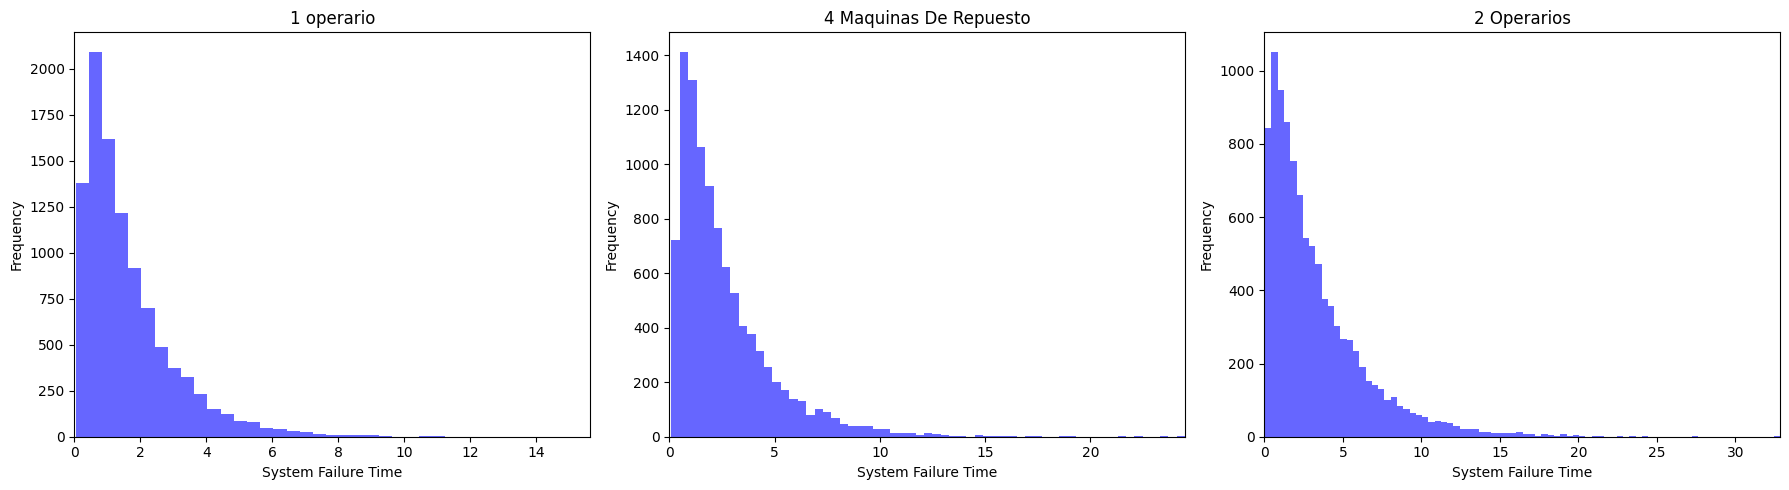

In [ ]:
plot_cases(
    titles=['1 operario', '4 Maquinas De Repuesto', '2 Operarios'],
    data_cases=[times_single, times_more_machines, times_parallel]
)

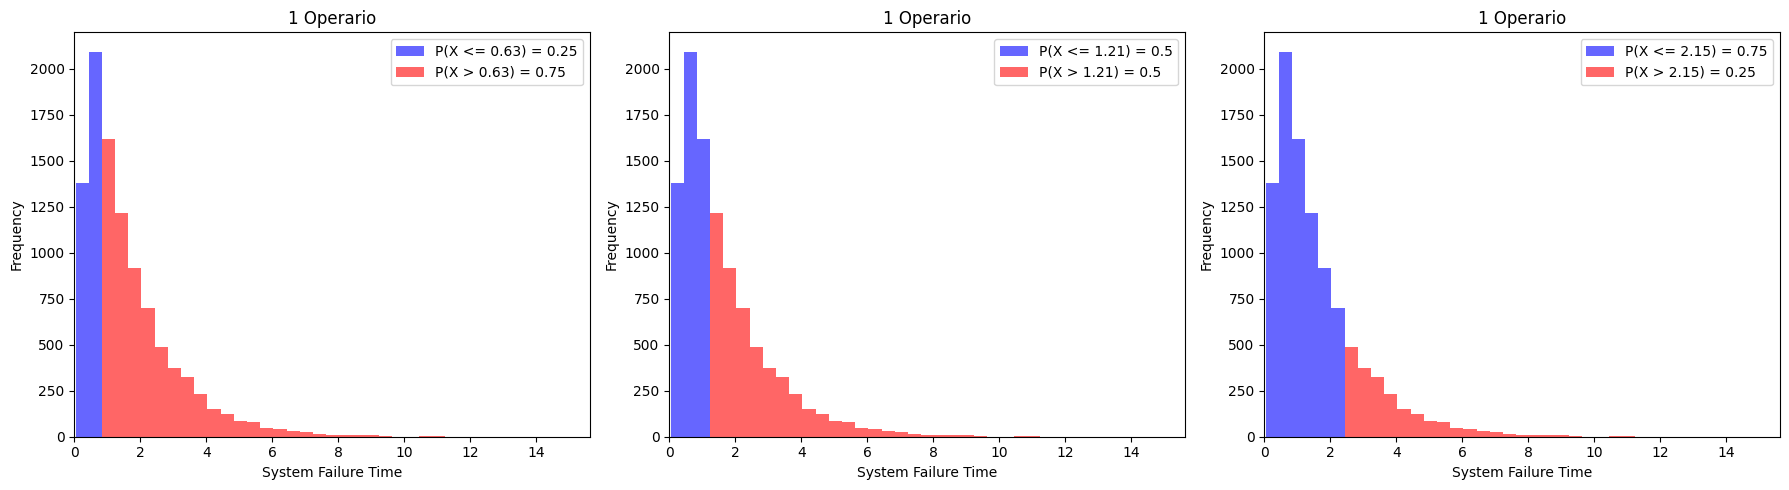

In [ ]:
plot_percentiles(probs=[0.25, 0.5, 0.75], title='1 Operario', data=times_single)

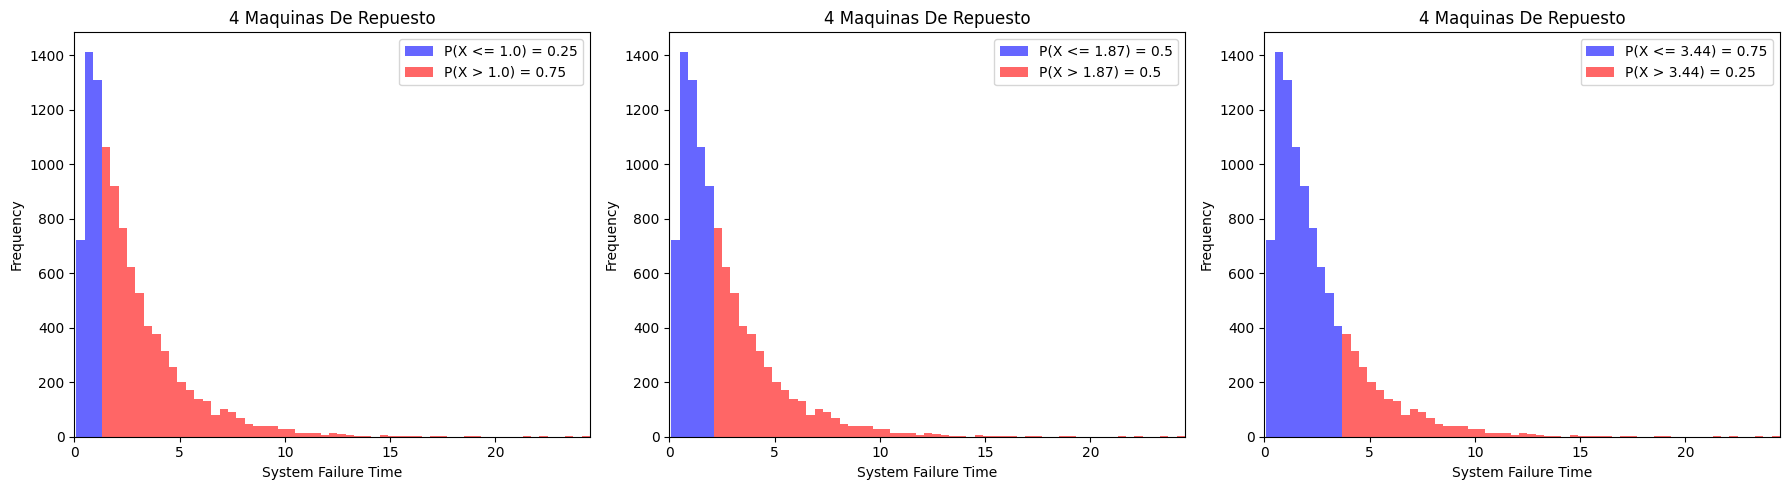

In [ ]:
plot_percentiles(probs=[0.25, 0.5, 0.75], title='4 Maquinas De Repuesto', data=times_more_machines)

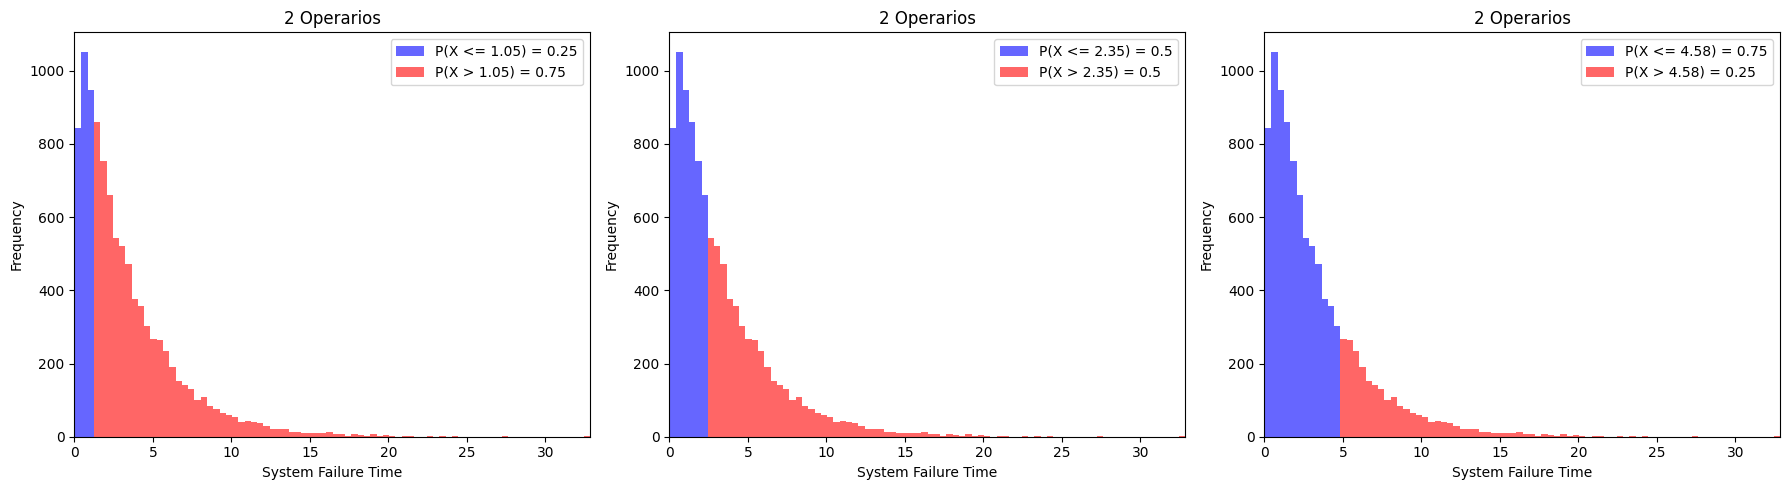

In [ ]:
plot_percentiles(probs=[0.25, 0.5, 0.75], title='2 Operarios', data=times_parallel)

En todos los casos hay una asimetría hacia la derecha.

